# **Desarrollo de un EJEMPLO DE ÁRBOLES DE DECISIÓN**

Accuracy: 0.96
Confusion Matrix:
[[ 89   4]
 [  4 103]]


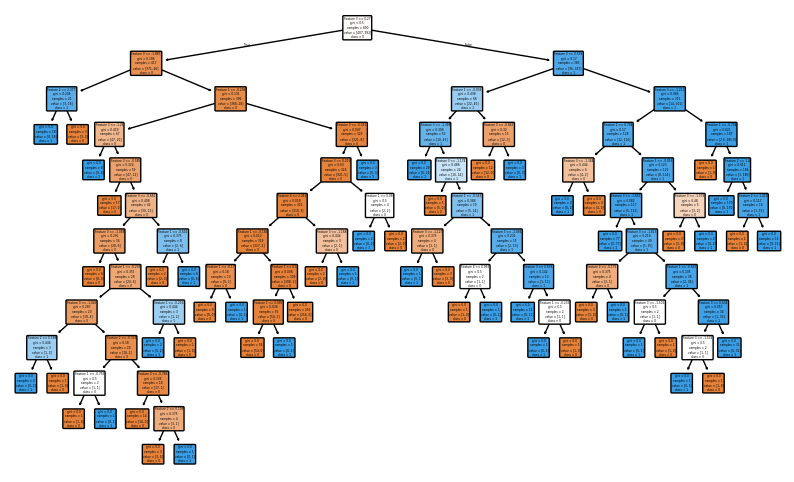

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Generar datos de ejemplo para clasificación binaria
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Crear una matriz de confusión para evaluar el rendimiento del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, rounded=True, class_names=['0', '1'], feature_names=['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 3'])
plt.show()



# **Desarrollo de un ejemplo de un algoritmo Random Forest**

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # características (largo y ancho de pétalos y sépalos)
y = iris.target  # etiquetas (setosa, versicolor, virginica)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")


Precisión del modelo: 1.00


**A continuación expongo algunos parámetros que visualicé en el ejemplo:**

**Matriz de Confusión**

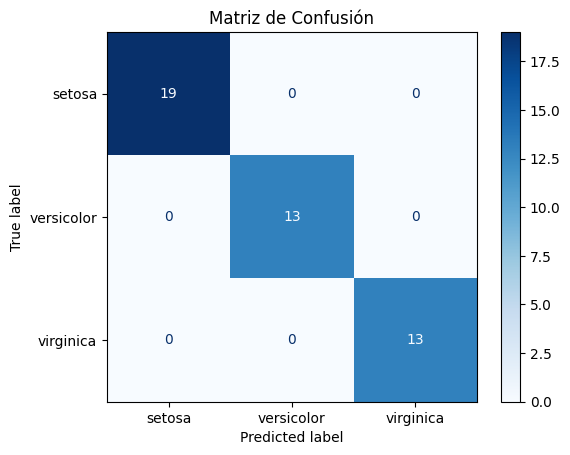

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


**Importancia de Características**

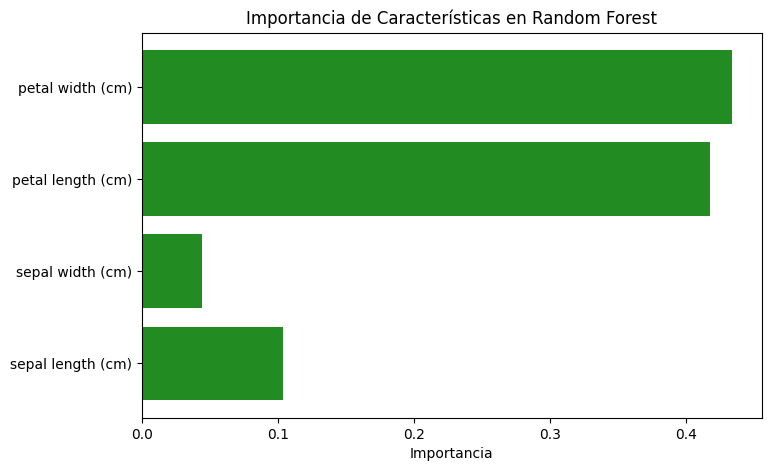

In [4]:
import pandas as pd

# Importancia de características
importancias = modelo.feature_importances_
nombres_caracteristicas = iris.feature_names

# Gráfico
plt.figure(figsize=(8, 5))
plt.barh(nombres_caracteristicas, importancias, color="forestgreen")
plt.xlabel("Importancia")
plt.title("Importancia de Características en Random Forest")
plt.show()


**Curva de aprendizaje simulada**

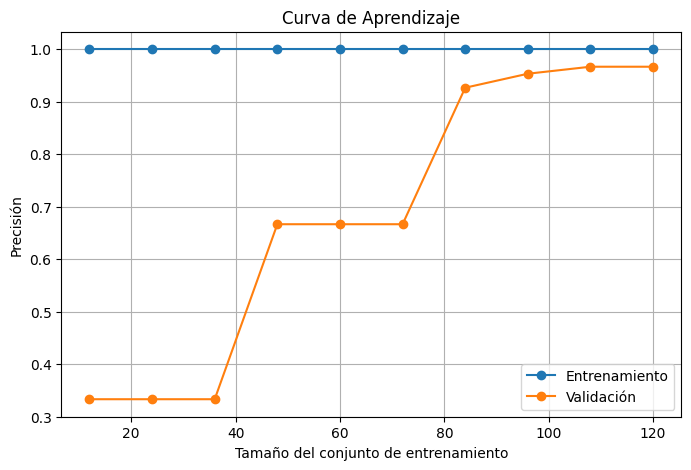

In [5]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    modelo, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Promediar resultados
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validación")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid(True)
plt.show()
